##Import Packages

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from utils import *

##Load the training and test datasets

In [23]:
train_set, test_set = load_data()

Show one of the images from each set in order to make sure the data is loaded properly.

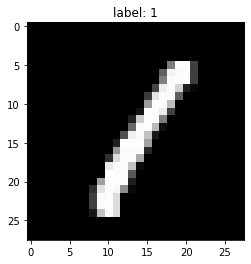

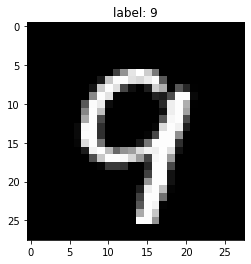

In [24]:
show_image(train_set[3])
show_image(test_set[16])

##Initiate the required hyperparameters and parameters

"He Initialization" is used  here to initialize the weights of the network. 
In this method we multiply the weights of each layer by:
$\sqrt{\frac{2}{\text{dimension of the previous layer}}}$

In [25]:
batch_size = 50
learning_rate = 1
epoch = 5

W1 = np.random.randn(16, 784) * np.sqrt(2 / 784)
b1 = np.zeros((16, 1))
grad_W1 = np.zeros((16, 784))
grad_b1 = np.zeros((16, 1))

W2 = np.random.randn(16, 16) * np.sqrt(2 / 16)
b2 = np.zeros((16, 1))
grad_W2 = np.zeros((16, 16))
grad_b2 = np.zeros((16, 1))

W3 = np.random.randn(10, 16) * np.sqrt(2 / 16)
b3 = np.zeros((10, 1))
grad_W3 = np.zeros((10, 16))
grad_b3 = np.zeros((10, 1))

In [26]:
def initiate_grads():
  global grad_W1, grad_b1, grad_W2, grad_b2, grad_W3, grad_b3

  grad_W1 = np.zeros((16, 784))
  grad_b1 = np.zeros((16, 1))

  grad_W2 = np.zeros((16, 16))
  grad_b2 = np.zeros((16, 1))

  grad_W3 = np.zeros((10, 16))
  grad_b3 = np.zeros((10, 1))

##Feed forward phase

In [27]:
def feed_forward(x):
  z1 = np.dot(W1, x) + b1
  a1 = sigmoid(z1)

  z2 = np.dot(W2, a1) + b2
  a2 = sigmoid(z2)

  z3 = np.dot(W3, a2) + b3
  a3 = sigmoid(z3)

  prediction = np.argmax(a3)

  return prediction, (x, z1, a1, z2, a2, z3, a3)

##Compute the accuracy of the model before being trained

In [28]:
accuracy = 0

for i in range(100):
  x = train_set[i][0]
  label = np.argmax(train_set[i][1])

  prediction, _ = feed_forward(x)
  
  accuracy += 1 if (prediction == label) else 0

print(f"Accuracy: {accuracy}%")

Accuracy: 14%


##Compute the cost

Here we use SSE to compute the cost of the network.

In [29]:
def compute_cost(y, label):
  return np.sum(np.square(y - label))

##Compute the gradients

The gradients of the network are computed using the following formulas and the chain rule.

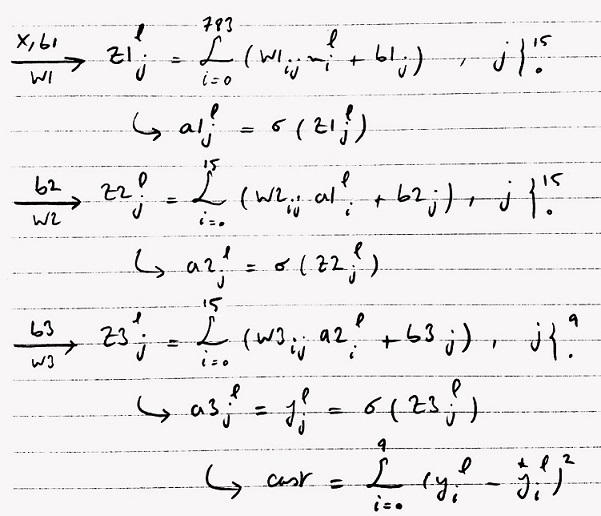

The "compute_grads_vectorized" function takes advantage of vectorization and is much faster than the "compute_grads" function.

In [30]:
def compute_grads(parameters, y):
  x, z1, a1, z2, a2, z3, a3 = parameters
  global grad_W3, grad_b3, grad_W2, grad_b2, grad_W1, grad_b1

  grad_a2 = np.zeros((16, 1))
  for k in range (10):
    grad_b3[k, 0] += 2 * (a3[k, 0] - y[k, 0]) * d_sigmoid(z3[k, 0])
    for j in range (16):
      grad_W3[k, j] += 2 * (a3[k, 0] - y[k, 0]) * d_sigmoid(z3[k, 0]) * a2[j, 0]
      grad_a2[j, 0] += 2 * (a3[k, 0] - y[k, 0]) * d_sigmoid(z3[k, 0]) * W3[k, j]

  grad_a1 = np.zeros((16, 1))
  for k in range (16):
    grad_b2[k, 0] += grad_a2[k, 0] * d_sigmoid(z2[k, 0])
    for j in range (16):
      grad_W2[k, j] += grad_a2[k, 0] * d_sigmoid(z2[k, 0]) * a1[j, 0]
      grad_a1[j, 0] += grad_a2[k, 0] * d_sigmoid(z2[k, 0]) * W2[k, j]

  for k in range (16):
    grad_b1[k, 0] += grad_a1[k, 0] * d_sigmoid(z1[k, 0])
    for j in range (784):
      grad_W1[k, j] += grad_a1[k, 0] * d_sigmoid(z1[k, 0]) * x[j, 0]

In [31]:
def compute_grads_vectorized(parameters, y):
  x, z1, a1, z2, a2, z3, a3 = parameters
  global grad_W3, grad_b3, grad_W2, grad_b2, grad_W1, grad_b1

  grad_W3 += 2 * (d_sigmoid(z3) * (a3 - y)) @ a2.T
  grad_b3 += 2 * d_sigmoid(z3) * (a3 - y)
  grad_a2 = W3.T @ (2 * d_sigmoid(z3) * (a3 - y))

  grad_W2 += (d_sigmoid(z2) * grad_a2) @ a1.T
  grad_b2 += d_sigmoid(z2) * grad_a2
  grad_a1 = W2.T @ (d_sigmoid(z2) * grad_a2)

  grad_W1 += (d_sigmoid(z1) * grad_a1) @ x.T
  grad_b1 += d_sigmoid(z1) * grad_a1

##Update the parameters

Update the parameters using the computed gradiants using one of the previous methods.

In [32]:
def update_parameters():
  global W3, b3, W2, b2, W1, b1
  W3 -= learning_rate * (grad_W3 / batch_size)
  b3 -= learning_rate * (grad_b3 / batch_size)
  W2 -= learning_rate * (grad_W2 / batch_size)
  b2 -= learning_rate * (grad_b2 / batch_size)
  W1 -= learning_rate * (grad_W1 / batch_size)
  b1 -= learning_rate * (grad_b1 / batch_size)

##Train the model

In [33]:
epoch_costs = []
#training_set = train_set[:100]
training_set = train_set
m = np.shape(training_set)[0]

start_time = time.perf_counter()

for e in range(epoch):
  random.shuffle(training_set)

  cost = 0
  accuracy = 0

  for batch_num in range(m // batch_size):
    for i in range(batch_num * batch_size, (batch_num + 1) * batch_size):
        x = training_set[i][0]
        label = training_set[i][1]

        # Forward phase
        prediction, parameters = feed_forward(x)
        _, _, _, _, _, _, a3 = parameters

        cost += compute_cost(a3, label)

        accuracy += 1 if prediction == np.argmax(label) else 0

        # Backprop phase
        #compute_grads(parameters, label)
        compute_grads_vectorized(parameters, label)

    update_parameters()
    initiate_grads()
    
  epoch_costs.append(cost / m)
  print(f'epoch #{e + 1}  |  cost: {(cost / m):.5f}  |  accuracy: {((accuracy / m) * 100):.2f}%')

end_time = time.perf_counter()
elapsed_time = (end_time - start_time)
print(f"\nElapsed time: {elapsed_time:.03f}s.")

epoch #1  |  cost: 0.40416  |  accuracy: 73.19%
epoch #2  |  cost: 0.14606  |  accuracy: 91.35%
epoch #3  |  cost: 0.11770  |  accuracy: 92.80%
epoch #4  |  cost: 0.10393  |  accuracy: 93.70%
epoch #5  |  cost: 0.09522  |  accuracy: 94.19%

Elapsed time: 132.375s.


Plot the cost over epochs:

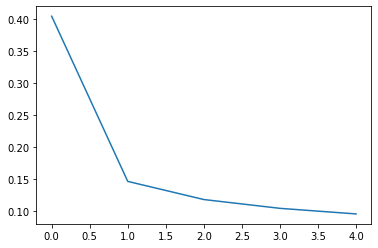

In [34]:
plt.plot(epoch_costs)
plt.show()

##Test the model on the test set

In [35]:
accuracy = 0
l = np.shape(test_set)[0]

for i in range(l):
  x = test_set[i][0]
  label = np.argmax(test_set[i][1])

  prediction, _ = feed_forward(x)
  
  accuracy += 1 if (prediction == label) else 0

print(f"Accuracy on the test set: {((accuracy / l) * 100):.02f}%")

Accuracy on the test set: 94.06%
